In [121]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score

import pandas as pd
import numpy as np

import plotly.express as px

import matplotlib.pyplot as plt

# !pip install --upgrade xlrd

features = 16 
dataset = pd.read_excel('./drive/MyDrive/datasets/Pistachio_16_Features_Dataset.xls')

dataset.head(10)

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4,Class
0,63391,1568.405,390.3396,236.7461,0.7951,284.0984,0.8665,73160,0.6394,1.6488,0.3238,0.7278,0.0062,0.0037,0.5297,0.8734,Kirmizi_Pistachio
1,68358,1942.187,410.8594,234.7525,0.8207,295.0188,0.8765,77991,0.6772,1.7502,0.2277,0.7181,0.0060,0.0034,0.5156,0.9024,Kirmizi_Pistachio
2,73589,1246.538,452.3630,220.5547,0.8731,306.0987,0.9172,80234,0.7127,2.0510,0.5951,0.6767,0.0061,0.0030,0.4579,0.9391,Kirmizi_Pistachio
3,71106,1445.261,429.5291,216.0765,0.8643,300.8903,0.9589,74153,0.7028,1.9879,0.4278,0.7005,0.0060,0.0030,0.4907,0.9755,Kirmizi_Pistachio
4,80087,1251.524,469.3783,220.9344,0.8823,319.3273,0.9657,82929,0.7459,2.1245,0.6425,0.6803,0.0059,0.0028,0.4628,0.9833,Kirmizi_Pistachio
5,52268,1154.150,383.8558,197.5020,0.8575,257.9723,0.8563,61039,0.5628,1.9436,0.4931,0.6721,0.0073,0.0038,0.4517,0.8778,Kirmizi_Pistachio
6,71693,1463.932,388.2366,252.8200,0.7589,302.1297,0.9156,78304,0.6892,1.5356,0.4204,0.7782,0.0054,0.0035,0.6056,0.9300,Kirmizi_Pistachio
7,62240,1898.450,385.7238,218.1349,0.8247,281.5074,0.8947,69563,0.6727,1.7683,0.2170,0.7298,0.0062,0.0035,0.5326,0.9418,Kirmizi_Pistachio
8,64319,2011.291,435.9127,213.7594,0.8715,286.1704,0.8633,74502,0.6542,2.0393,0.1998,0.6565,0.0068,0.0033,0.4310,0.8789,Kirmizi_Pistachio
9,78115,1238.623,492.3300,204.9987,0.9092,315.3714,0.9616,81236,0.7105,2.4016,0.6398,0.6406,0.0063,0.0026,0.4103,0.9855,Kirmizi_Pistachio


In [122]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2148 entries, 0 to 2147
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           2148 non-null   int64  
 1   PERIMETER      2148 non-null   float64
 2   MAJOR_AXIS     2148 non-null   float64
 3   MINOR_AXIS     2148 non-null   float64
 4   ECCENTRICITY   2148 non-null   float64
 5   EQDIASQ        2148 non-null   float64
 6   SOLIDITY       2148 non-null   float64
 7   CONVEX_AREA    2148 non-null   int64  
 8   EXTENT         2148 non-null   float64
 9   ASPECT_RATIO   2148 non-null   float64
 10  ROUNDNESS      2148 non-null   float64
 11  COMPACTNESS    2148 non-null   float64
 12  SHAPEFACTOR_1  2148 non-null   float64
 13  SHAPEFACTOR_2  2148 non-null   float64
 14  SHAPEFACTOR_3  2148 non-null   float64
 15  SHAPEFACTOR_4  2148 non-null   float64
 16  Class          2148 non-null   object 
dtypes: float64(14), int64(2), object(1)
memory usage: 28

In [123]:
X = dataset.iloc[:,0:features]

X = StandardScaler().fit_transform(X)

In [124]:
inits = ['k-means++', 'random']
inertia = []
for init in inits:
    km = KMeans(
        n_clusters=2, 
        init=init
    )
    km.fit(X)
    inertia.append(km.inertia_)

pd.DataFrame(
    data=inertia, 
    columns=["Inertia value"], 
    index=inits
)

,Inertia value
k-means++,25037.973062
random,25037.973062


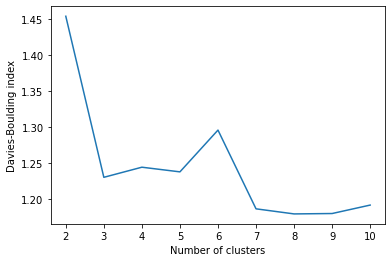

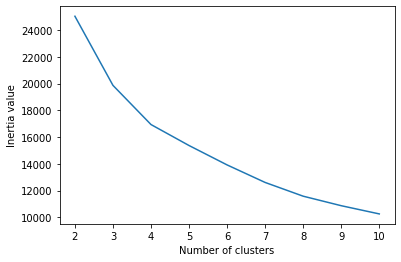

In [125]:
db = {}
inertia = []
for i in range(2, 11):
    km = KMeans(
        n_clusters=i, 
        random_state=30,
        init="k-means++")
    km.fit(X)
    inertia.append(km.inertia_)
    db_index = davies_bouldin_score(X, km.labels_)
    db.update({i: db_index})

# DB curve
plt.plot(list(db.keys()), list(db.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Davies-Boulding index")
plt.show()

# Inertia curve
plt.plot(range(2, 11), inertia)
plt.xlabel("Number of clusters")
plt.ylabel("Inertia value")
plt.show()

In [126]:
dataset['Class'].value_counts().to_frame()

,Class
Kirmizi_Pistachio,1232
Siit_Pistachio,916


In [127]:
km = KMeans(
    n_clusters=2, 
    random_state=30,
    init='k-means++'
)
km.fit(X)  
dataset['Labels'] = km.labels_
dataset['Labels'].value_counts().to_frame()

,Labels
0,1134
1,1014


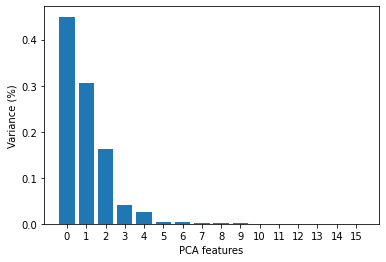

In [128]:
pca = PCA()

components = pca.fit_transform(X)
features = range(pca.n_components_)

plt.bar(features, pca.explained_variance_ratio_)
plt.xlabel('PCA features')
plt.ylabel('Variance (%)')
plt.xticks(features)
plt.show()

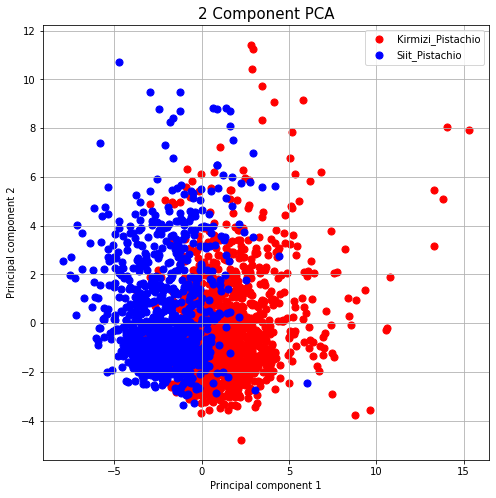

In [129]:
df1 = pd.DataFrame(
    data = components[:,:2],
    columns = ['principal component 1', 'principal component 2']
)
df = pd.concat([df1, dataset['Class']], axis = 1)

fig = plt.figure(figsize = (8,8))

ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal component 1')
ax.set_ylabel('Principal component 2')
ax.set_title('2 Component PCA', fontsize = 15)

labels = ['Kirmizi_Pistachio', 'Siit_Pistachio']
colors = ['r', 'b']
for label, color in zip(labels, colors):
    i = df['Class'] == label
    ax.scatter(
        df.loc[i, 'principal component 1'], 
        df.loc[i, 'principal component 2'], 
        c = color, 
        s = 50
    )
ax.legend(labels)
ax.grid()

In [130]:
features = 28
dataset = pd.read_excel('./drive/MyDrive/datasets/Pistachio_28_Features_Dataset.xls')

In [131]:
X = dataset.iloc[:,0:features]

X = StandardScaler().fit_transform(X)

In [132]:
inits = ['k-means++', 'random']
inertia = []
for init in inits:
    km = KMeans(
        n_clusters=2, 
        init=init
    )
    km.fit(X)
    inertia.append(km.inertia_)

pd.DataFrame(
    data=inertia, 
    columns=["Inertia value"], 
    index=inits
)

,Inertia value
k-means++,48184.168842
random,48183.656282


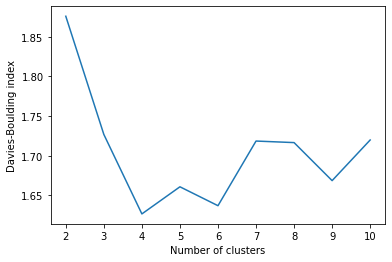

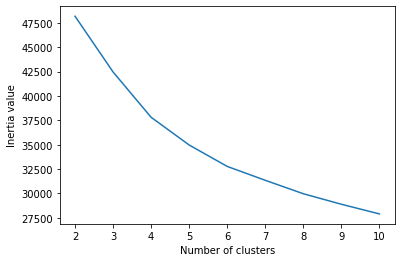

In [133]:
db = {}
inertia = []
for i in range(2, 11):
    km = KMeans(
        n_clusters=i, 
        random_state=30,
        init="k-means++")
    km.fit(X)
    inertia.append(km.inertia_)
    db_index = davies_bouldin_score(X, km.labels_)
    db.update({i: db_index})

# DB curve
plt.plot(list(db.keys()), list(db.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Davies-Boulding index")
plt.show()

# Inertia curve
plt.plot(range(2, 11), inertia)
plt.xlabel("Number of clusters")
plt.ylabel("Inertia value")
plt.show()

In [134]:
dataset['Class'].value_counts().to_frame()

,Class
Kirmizi_Pistachio,1232
Siirt_Pistachio,916


In [135]:
km = KMeans(
    n_clusters=2, 
    random_state=30,
    init='k-means++'
)
km.fit(X)  
dataset['Labels'] = km.labels_
dataset['Labels'].value_counts().to_frame()

,Labels
0,1239
1,909


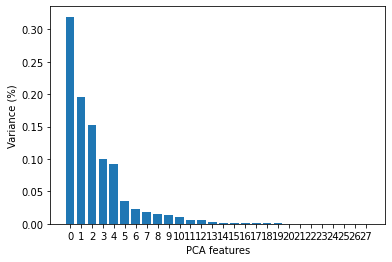

In [136]:
pca = PCA()

components = pca.fit_transform(X)
features = range(pca.n_components_)

plt.bar(features, pca.explained_variance_ratio_)
plt.xlabel('PCA features')
plt.ylabel('Variance (%)')
plt.xticks(features)
plt.show()

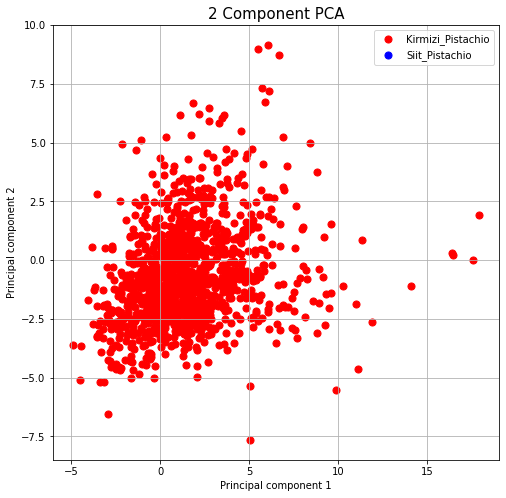

In [137]:
df1 = pd.DataFrame(
    data = components[:,:2],
    columns = ['principal component 1', 'principal component 2']
)
df = pd.concat([df1, dataset['Class']], axis = 1)

fig = plt.figure(figsize = (8,8))

ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal component 1')
ax.set_ylabel('Principal component 2')
ax.set_title('2 Component PCA', fontsize = 15)

labels = ['Kirmizi_Pistachio', 'Siit_Pistachio']
colors = ['r', 'b']
for label, color in zip(labels, colors):
    i = df['Class'] == label
    ax.scatter(
        df.loc[i, 'principal component 1'], 
        df.loc[i, 'principal component 2'], 
        c = color, 
        s = 50
    )
ax.legend(labels)
ax.grid()